# Exploring the behavioural response to Covid-19

This workbook works with survey data of 478 features, in order to explore trends from people from diverse demographics, in their a) response to Covid-19 and their b) general preferences. 

##### See the GitHub ReadMe for full discussion of the analytics below (and answers to questions). 

This notebook explores:
* The needs of survey respondants, resulting from covid-19. Using NLP and topic modelling, with LSA and LDA. 
* The effects of covid-19 on survey respondents, approached in the same way.
* Profiling of survey respondants, using clustering. 

Sections:
0. Loading data
1. Missingness
2. Column descriptions
3. Effects feature
    i. NLP processing
    ii. Wordcloud visual
    iii. Create topic model 
    iv. Three topic models 
        a. SLA model
        b. SLA with TFIDF model
        c. LDA model
    v. Optimise LDA
        a. Adding bigrams & trigrams
        b. visualising clusters 
        c. Assigning final topics to responses df
    vi. Conclusions
4. Needs feature 
    i. NLP processing
    ii. Wordcloud visual
    iii. Create LDA topic model 
    iv. Visualise clusters
    v. Assigning final topics to responses df
    vi. Conclusions
5. Profiling 
    i. Consolidate data
    ii. Clustering (& automatic encoding)
        a. Cao initialisation
        b. Huang initialisation
    iii. Optimising k, using elbow plot
    iv. Final model
    v. Profiling based on clustering: Group A or Group B
        a) 'need' and 'effect' variables
        b) Demographics
        c) Numerical questions; OCEAN personality scores + 'where are we now?'
        d) The effect on employment situation
        e) Current feelings / emotions
        f) Likes, brands & passions

## 0. Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./0_Data/data.csv', encoding = 'latin-1')
df.head()

,S01Q02,S01Q03,S01Q04,S01Q05,S01Q06,S02Q01_01,S02Q01_02,S02Q01_03,S02Q01_04,S02Q01_05,...,S08Q05,S08Q06,S08Q07,time_complete,O,C,E,A,N,WHGT
0,Female,55-64,"North East, Yorkshire and The Humber",British,"Intermediate managerial, administrative and pr...",Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,...,Public services and administration,Living comfortably on present income,DN18,903,3.624534,4.710974,4.736639,4.773907,4.000000,0.748160
1,Female,35-44,East of England,British,Semi and unskilled manual worker,Checked,Unchecked,Unchecked,Unchecked,Unchecked,...,Other,Finding it difficult on present income,NR1,914,3.944496,4.079470,3.955570,4.539959,5.000000,1.341864
2,Female,25-34,Scotland,British,"Supervisory, clerical and junior managerial, a...",Unchecked,Unchecked,Unchecked,Checked,Unchecked,...,Public services and administration,Finding it difficult on present income,G4,1557,2.284515,2.710974,3.000000,3.539959,3.243496,0.782437
3,Female,25-34,South East,EU/EEA citizen,"Intermediate managerial, administrative and pr...",Checked,Checked,Unchecked,Unchecked,Unchecked,...,Transport and logistics,Finding it very difficult on present income,GU17,1411,1.964552,3.368496,2.485512,3.258197,4.000000,0.735726
4,Male,18-24,London / Greater London,British,"Higher managerial, administrative and professi...",Checked,Unchecked,Unchecked,Unchecked,Unchecked,...,"Accountancy, banking and finance",Coping on present income,UB10,737,2.750933,3.315043,3.258854,3.000000,3.000000,0.751872


In [2]:
#have a little nosey at the data
pd.Series(df['S03Q03'])[6]

"Can't go out and buy stuff at the shops anymore. Quite suffocating being at home constantly."

In [3]:
# Overview of the data 
df.describe()

,S02Q02,S02Q06,S05Q01b_Harm,S05Q01b_Fariness,S05Q01b_In_Group,S05Q01b_Authority,S05Q01b_Purity,S06Q06_01,S06Q06_02,S06Q06_03,S08Q01_01,S08Q01_02,time_complete,O,C,E,A,N,WHGT
count,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000
mean,1.861569,2.867566,2.521739,2.710145,2.748126,3.487256,3.532734,1.858071,2.419290,1.722639,2.408296,3.276862,1745.218391,3.641129,3.769647,3.470712,3.949370,3.217998,1.000000
std,0.883361,1.374028,1.332536,1.311084,1.336236,1.316800,1.446739,0.752227,0.763942,0.760613,1.246881,1.288142,1114.374640,0.732736,0.691672,0.873015,0.646661,1.006947,0.320683
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,301.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.599536
25%,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1139.000000,3.249067,3.342479,2.983258,3.539959,2.492546,0.785425
50%,2.000000,3.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,3.000000,2.000000,2.000000,3.000000,1510.000000,3.659981,3.736991,3.494527,4.000000,3.243496,0.887787
75%,2.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,2.000000,3.000000,2.000000,3.000000,4.000000,2021.000000,4.035448,4.315043,4.000000,4.313866,4.000000,1.113174
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,3.000000,5.000000,5.000000,18865.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.716611


In [4]:
df.shape

(2001, 479)

## 1. Missingness

In [5]:
# Identify columns with missing values
has_nas = df.columns[df.isnull().sum() > 0]
print(has_nas)

Index(['S03Q03', 'S03Q04', 'S03Q08b_20_ELSE', 'S03Q09_21_OTHER', 'S03Q18',
       'S07Q02_24_OTHER', 'S07Q03_13_OTHER'],
      dtype='object')


In [6]:
# Calculate proportion missing, to decide how to deal with missingness - less than 1% in all cases so will drop na's
for col in has_nas:
    prop_missing = df[col].isnull().mean()
    print(col, prop_missing)

S03Q03 0.0004997501249375312
S03Q04 0.0024987506246876563
S03Q08b_20_ELSE 0.0004997501249375312
S03Q09_21_OTHER 0.0004997501249375312
S03Q18 0.0014992503748125937
S07Q02_24_OTHER 0.0004997501249375312
S07Q03_13_OTHER 0.0024987506246876563


In [7]:
# Drop all needs / effects response rows with null values 
df['S03Q03'].replace(' ', np.nan, inplace=True)
df['S03Q04'].replace(' ', np.nan, inplace=True)
df_nulls = df.dropna(axis = 0, how = 'any').reset_index(drop = True)
df_nulls.shape[0]

# Removed 549 rows in total due to no response

1452

## 2. Column descriptions 

In [8]:
# Upload variable questions and descriptions 
schema = pd.read_csv('./0_Data/feature_dictionary.csv', encoding = 'latin-1', header = None)
schema = schema.rename(columns = {0:'col', 1:'desc'})

schema.head()

,col,desc
0,S01Q02,What is your gender?
1,S01Q03,How old are you?
2,S01Q04,In which region of the UK do you live?
3,S01Q05,What is your nationality? If you hold multiple...
4,S01Q06,What would best describe the occupation of the...


In [9]:
# function to call col name descriptor
def get_description(column_name, schema = schema):
    desc = list(schema[schema['col'] == column_name]["desc"])[0]
    return desc

# get_description(df_nulls.columns[0]) # This should return a string of the first column description

## 3. S03Q03 feature, 'effects' 
SLA for topic extraction from the question:

In [10]:
get_description('S03Q03')

'How did the coronavirus outbreak affect you and/or your family? Please describe'

#### Import libraries & pre-process feature

In [11]:
#import modules
#import os.path
from gensim import corpora
from gensim import models
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [12]:
effect_txt = df_nulls['S03Q03']
# effect_txt.head

### i. NLP processing
Including tokenisation, creating corpus and dictionary. 

In [13]:
# Preprocessing fn for text strings
def preprocess_data(effect_txt):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """    
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # English stop words list
    en_stop = set(stopwords.words('english'))
    # p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in effect_txt:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # lemmatize tokens
        lemmed_tokens = [wordnet_lemmatizer.lemmatize(i, pos="v") for i in stopped_tokens]
        # add tokens to list
        texts.append(lemmed_tokens)
    return texts

In [14]:
doc_clean_effect = preprocess_data(effect_txt)

### ii. Wordcloud visual of responses

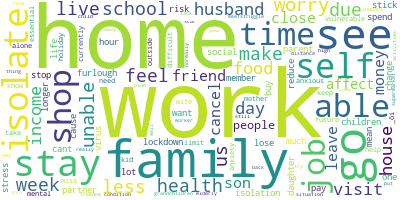

In [15]:
# Make a pretty visual of whats going on behind this question
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed responses together.
long_string = ','.join(" ".join(response) for response in doc_clean_effect)

# Create a WordCloud object
wordcloud = WordCloud(background_color = "white", max_words = 1000, contour_width = 3, contour_color = 'steelblue', collocations = False)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

### iii. Create Doc-Term matrix & prepare topic models

In [16]:
# Make a document-term matrix and dictionary of terms
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of the corpus and into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

    return dictionary, doc_term_matrix

In [17]:
# Generate LSA, TF-IDF LSA, or LDA model (using Gensim)
def create_topic_model(doc_clean, number_of_topics, words, modeltype):
    """
    Input  : clean document : from prepare corpus function 
             number of topics : numeric 
             number of words associated with each topic : numeric 
             model type : either 'tfidf' or 'lsa' or 'lda'
    Purpose: create topic model using gensim
    Output : return model
    """
    dictionary, doc_term_matrix = prepare_corpus(doc_clean)
    if modeltype == 'tfidf':
        # generate TF-IDF corpus
        tfidfmodel = models.TfidfModel(doc_term_matrix, smartirs = 'ntc')
        # generate LSA model
        topic_model = models.LsiModel(tfidfmodel[doc_term_matrix], num_topics = number_of_topics, id2word = dictionary)  # train model
    elif modeltype == 'lsa':
        # generate LSA model
        topic_model = models.LsiModel(doc_term_matrix, num_topics = number_of_topics, id2word = dictionary)  # train model
    elif modeltype == 'lda' :
        # generate LDA model
        tfidfmodel = models.TfidfModel(doc_term_matrix, smartirs = 'ntc')
        topic_model = models.LdaModel(corpus = tfidfmodel[doc_term_matrix], id2word = dictionary, num_topics = number_of_topics, 
                                      random_state = 100, alpha = 'symmetric', iterations = 100, per_word_topics = True)
    else:
        print("Unknown model specificed, must be either 'lda', 'tfidf' or 'lsa'")
    
    print(topic_model.print_topics(num_topics = number_of_topics, num_words = words))
    
    return topic_model

#### How many topics?

In [18]:
# Determine optimal number of topics using coherance scores
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, modeltype, stop, start = 2, step = 2):
    """
    Input   : dictionary : Gensim dictionary
              corpus / doc_term_matrix : Gensim corpus
              texts / doc_clean : List of input texts, already pre processed
              modeltype : either 'lsa' or 'lda'
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for number_of_topics in range(start, stop, step):
        #create model, dependant on type specified
        if (modeltype == 'lsa') :
            # generate LSA model
            model = models.LsiModel(doc_term_matrix, num_topics = number_of_topics, id2word = dictionary)  # train model
        elif (modeltype == 'lda') :
            # generate LDA model
            tfidfmodel = models.TfidfModel(doc_term_matrix, smartirs = 'ntc')
            model = models.LdaMulticore(corpus = tfidfmodel[doc_term_matrix], id2word = dictionary, num_topics = 10, 
                                        random_state = 100, chunksize = 100, passes = 10)
        else:
            print("Unknown model specificed, must be either 'lda' or 'lsa'")
        
        model_list.append(model)
        coherencemodel = CoherenceModel(model = model, texts = doc_clean, dictionary = dictionary, coherence = 'c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

In [19]:
def plot_graph(doc_clean, start, stop, step, modeltype):
    """
    Input   : doc_clean : tokenised list of lists representing clean documents 
              start, stop, step : range for the number of topics 
              modeltype : either 'lsa', 'tfidf', 'lda'
    Purpose : create & graph a range of topic models, in order to identify optimum number of topics 
    Output  : graph of coherence for differing topic numbers
    """
    dictionary, doc_term_matrix = prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix, doc_clean, modeltype,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc = 'best')
    plt.show() 

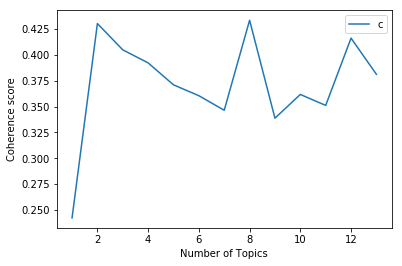

In [20]:
start, stop, step = 1, 14, 1
plot_graph(doc_clean_effect, start, stop, step, modeltype = 'lsa')

#### Function to calculate coherence values for three models used

In [21]:
# Calculate individual coherence values per model
def calc_coherence (model, doc_clean):
    """
    Input   : model : the topic model created previously
              doc_clean : tokenised list of lists representing clean documents 
    Purpose : Calculate coherance value for the model, an indicator of effectiveness
    Output  : Coherence score
    """
    dictionary, doc_term_matrix = prepare_corpus(doc_clean) 
    coherencemodel = CoherenceModel(model, texts = doc_clean, dictionary = dictionary, coherence = 'c_v')
    coherence = coherencemodel.get_coherence() 
    return print("Coherence Score:", coherence)

### iv. Explore three topic models 
#### a. Run SLA model using 3 topics

In [22]:
# Run LSA Model
number_of_topics = 3
words = 5
lsa_model_effect = create_topic_model(doc_clean_effect, number_of_topics, words, modeltype = 'lsa')

[(0, '0.600*"work" + 0.533*"home" + 0.245*"go" + 0.240*"family" + 0.154*"see"'), (1, '-1.000*"_ôí" + 0.000*"holiday" + -0.000*"would" + 0.000*"pay" + -0.000*"two"'), (2, '0.541*"family" + 0.421*"see" + -0.409*"home" + -0.288*"work" + 0.195*"go"')]


In [23]:
# Calc cohearance vale for the LSA model
calc_coherence(model = lsa_model_effect, doc_clean = doc_clean_effect)

Coherence Score: 0.3915904072913284


#### LSA: Three topics have been identified:
##### Topic 1 : working from home
work, home, go, family, see
##### Topic 2 : anxiety
miss, need, anxiety, members
##### Topic 3 : family 
family, see, home, work, go

#### b. Run TD-IDF SLA model using 3 topics

In [24]:
# Run TF-IDF LSA Model
number_of_topics = 3
words = 5
tfidf_lsamodel_effect = create_topic_model(doc_clean_effect, number_of_topics, words, modeltype = 'tfidf')

[(0, '0.533*"home" + 0.533*"work" + 0.275*"stay" + 0.177*"family" + 0.172*"go"'), (1, '-0.419*"isolate" + -0.389*"self" + -0.350*"see" + 0.346*"home" + -0.337*"family"'), (2, '0.525*"isolate" + 0.493*"self" + -0.363*"see" + -0.251*"family" + -0.207*"able"')]


In [25]:
# Calc cohearance vale for the TF-IDF LSA model
calc_coherence(model = tfidf_lsamodel_effect, doc_clean = doc_clean_effect)

Coherence Score: 0.34498821863137635


#### TFIDF LSA: Three topics have been identified:
##### Topic 1 : working from home
work, home, stay, family, go

##### Topic 2 : staying at hime
isolate, self, family, see, home

##### Topic 3 : cant see family 
isolate, self, see, family, able

#### c. Run LDA model using 3 topics

In [26]:
# Run LDA Model
number_of_topics = 3
words = 5
lda_model_effect = create_topic_model(doc_clean_effect, number_of_topics, words, modeltype = 'lda')

[(0, '0.009*"isolation" + 0.009*"home" + 0.008*"work" + 0.007*"see" + 0.006*"worry"'), (1, '0.011*"work" + 0.010*"family" + 0.010*"home" + 0.010*"stay" + 0.008*"go"'), (2, '0.019*"work" + 0.017*"home" + 0.012*"isolate" + 0.010*"see" + 0.010*"self"')]


In [27]:
# Calc cohearance vale for the LDA model
calc_coherence(model = lda_model_effect, doc_clean = doc_clean_effect)

Coherence Score: 0.19581458963290108


#### LDA: Three topics have been identified:
##### Topic 1 : working from home
isolation, home, work, see, worry

##### Topic 2 : seeing family
work, family, home, stay, go

##### Topic 3 : staying at home
work, home, isolate, see, self

### v. Working with LDA to explore & optimise the results

So far the model has achieved a coherance score of only ~0.2 for a TFIDF LDA model, and ~0.22 for a simple LDA model. The main disadvantage with this model is the similarities between topics for their top terms (theres a lot of repitition). 

In order to improve the model, the following will be explored:
##### a. including bigrams and trigrams
##### b. visualising the topic modelling clusters
##### c. finally, deducing topic class from the model for each document and adding to the original dataframe

#### a. Bigrams & trigrams 

In [28]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

# make bigrams and trigrams function
def make_grams(doc_clean = None, mincount = 10, threshld = 10):
    bigram = Phrases(doc_clean, min_count = mincount)
    bigram_phraser = Phraser(bigram)

    trigram = Phrases(bigram[doc_clean], min_count = mincount, threshold = threshld)
    trigram_phraser = Phraser(trigram)

    gram_docs = []
    for doc in doc_clean:
        gram_docs.append(bigram_phraser[doc])
    for doc in doc_clean:
        gram_docs.append(trigram_phraser[doc])   
    return gram_docs

In [29]:
# apply bigrams & trigrams 
gram_docs_effect = make_grams(doc_clean = doc_clean_effect, mincount = 10, threshld = 10)

#### Plot coherance against topic number, to find optimal number of topics

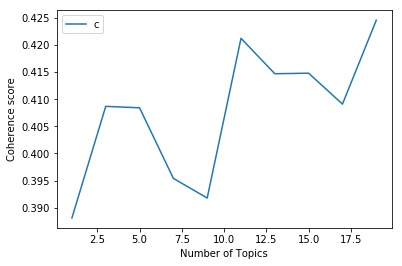

In [30]:
start, stop, step = 1, 20, 2
plot_graph(gram_docs_effect, start, stop, step, modeltype = 'lda')

#### Re-run LDA model using bigrams & trigrams, for optimal topics

In [31]:
# Run LDA Model
number_of_topics = 3
words = 5
lda_model_effect_grams = create_topic_model(gram_docs_effect, number_of_topics, words, modeltype = 'lda')

[(0, '0.015*"family" + 0.012*"see" + 0.010*"home" + 0.010*"stay" + 0.010*"work"'), (1, '0.022*"work" + 0.019*"home" + 0.015*"self_isolate" + 0.007*"isolation" + 0.007*"go"'), (2, '0.016*"go" + 0.014*"able" + 0.013*"work" + 0.011*"stay_home" + 0.011*"family"')]


In [32]:
# Calc cohearance vale for the LDA model
calc_coherence(model = lda_model_effect_grams, doc_clean = gram_docs_effect)

Coherence Score: 0.27358972245879903


The coherence score has improved by ~8% thanks to encorporating bigrams and trigrams. Next we visualise the results, to explore the topic segmentation. 

#### b. Plotting the LDA results

In [33]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
import matplotlib.colors as mcolors

def visualise_lda_results(doc_clean, lda_model, number_of_topics):
    """
    Input   : doc_clean : tokenised list of lists representing clean documents 
              start, stop, step : range for the number of topics 
              modeltype : either 'lsa', 'tfidf', 'lda'
    Purpose : create & graph a range of topic models, in order to identify optimum number of topics 
    Output  : graph of coherence for differing topic numbers
    """
    # Get topic weights
    dictionary, doc_term_matrix = prepare_corpus(doc_clean)
    topic_weights = []
    for i, row_list in enumerate(lda_model[doc_term_matrix]):
        topic_weights.append([w for i, w in row_list[0]])
    
    # Array of topic weights    
    arr = pd.DataFrame(topic_weights).fillna(0).values
    # Keep the well separated points (optional)
    arr = arr[np.amax(arr, axis = 1) > 0.35]
    # Dominant topic number in each doc
    topic_num = np.argmax(arr, axis = 1)

    # tSNE Dimension Reduction
    tsne_model = TSNE(n_components = 2, verbose = 1, random_state = 0, angle = .99, init = 'pca')
    tsne_lda = tsne_model.fit_transform(arr)

    # Plot the Topic Clusters using Bokeh
    output_notebook()
    mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
    plot = figure(title = "t-SNE Clustering of {} LDA Topics".format(number_of_topics), 
              plot_width = 900, plot_height = 700)
    plot.scatter(x = tsne_lda[:,0], y = tsne_lda[:,1], color = mycolors[topic_num])
    show(plot)

In [34]:
visualise_lda_results(gram_docs_effect, lda_model_effect_grams, number_of_topics)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2896 samples in 0.004s...
[t-SNE] Computed neighbors for 2896 samples in 0.047s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2896
[t-SNE] Computed conditional probabilities for sample 2000 / 2896
[t-SNE] Computed conditional probabilities for sample 2896 / 2896
[t-SNE] Mean sigma: 0.005189
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.235470
[t-SNE] KL divergence after 1000 iterations: 0.337311


Loading BokehJS ...

In [37]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
dictionary, doc_term_matrix = prepare_corpus(gram_docs_effect)
vis = pyLDAvis.gensim.prepare(lda_model_effect_grams, doc_term_matrix, dictionary)
vis
# A low Lambda value indicates how exclusive a word is to a topic, 
# or Lambda closer to 1 indicates the overall probability of a word in the topics (frequency)

/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.077757 -0.004433       1        1  37.883995
1      0.043132 -0.058564       2        1  36.574200
0      0.034625  0.062997       3        1  25.541800, topic_info=    Category        Freq            Term       Total  loglift  logprob
54   Default  161.000000    self_isolate  161.000000  30.0000  30.0000
68   Default  147.000000            able  147.000000  29.0000  29.0000
175  Default   69.000000           money   69.000000  28.0000  28.0000
78   Default  101.000000            stay  101.000000  27.0000  27.0000
211  Default   52.000000    stay_indoors   52.000000  26.0000  26.0000
102  Default  221.000000          family  221.000000  25.0000  25.0000
167  Default   74.000000       isolation   74.000000  24.0000  24.0000
483  Default   30.000000      employment   30.000000  23.0000  23.0000
685  Default   41.000000         freedom   41.000000  22.0000  22.0000
21   Default  209.000000              go  209.000000  21.0000  21.0000
13   Default  110.000000           worry  110.000000  20.0000  20.0000
32   Default  139.000000       stay_home  139.000000  19.0000  19.0000
125  Default  122.000000          unable  122.000000  18.0000  18.0000
315  Default   49.000000          longer   49.000000  17.0000  17.0000
420  Default   45.000000            dont   45.000000  16.0000  16.0000
637  Default   22.000000            self   22.000000  15.0000  15.0000
989  Default   50.000000  self_isolation   50.000000  14.0000  14.0000
31   Default  203.000000             see  203.000000  13.0000  13.0000
20   Default   70.000000            food   70.000000  12.0000  12.0000
229  Default   62.000000           hours   62.000000  11.0000  11.0000
249  Default   39.000000    job_security   39.000000  10.0000  10.0000
589  Default   32.000000              ok   32.000000   9.0000   9.0000
146  Default   84.000000        furlough   84.000000   8.0000   8.0000
36   Default  281.000000            home  281.000000   7.0000   7.0000
281  Default   46.000000           virus   46.000000   6.0000   6.0000
348  Default   64.000000          reduce   64.000000   5.0000   5.0000
831  Default   17.000000            play   17.000000   4.0000   4.0000
259  Default   33.000000            good   33.000000   3.0000   3.0000
213  Default   79.000000         isolate   79.000000   2.0000   2.0000
475  Default   21.000000           level   21.000000   1.0000   1.0000
..       ...         ...             ...         ...      ...      ...
281   Topic3   25.818432           virus   46.305706   0.7807  -5.3949
298   Topic3   15.410982          member   25.141483   0.8754  -5.9109
102   Topic3   83.773804          family  221.827301   0.3911  -4.2179
138   Topic3   27.309708           stick   52.876568   0.7041  -5.3388
168   Topic3   20.012274          social   35.784439   0.7837  -5.6497
13    Topic3   47.612976           worry  110.706032   0.5211  -4.7829
20    Topic3   33.078209            food   70.563004   0.6072  -5.1471
146   Topic3   37.320457        furlough   84.635117   0.5460  -5.0265
756   Topic3   21.273697            loss   39.658424   0.7420  -5.5885
178   Topic3   23.550400            wife   45.522758   0.7058  -5.4869
213   Topic3   35.387604         isolate   79.333130   0.5576  -5.0796
31    Topic3   69.976273             see  203.979584   0.2950  -4.3979
125   Topic3   48.434582          unable  122.718658   0.4352  -4.7658
492   Topic3   16.216913      key_worker   27.861031   0.8237  -5.8600
64    Topic3   33.625420          income   84.604248   0.4422  -5.1307
2     Topic3   40.034607             get  114.782806   0.3116  -4.9563
36    Topic3   59.455013            home  281.609497  -0.1904  -4.5608
544   Topic3   20.783699            meet   44.762707   0.5976  -5.6118
153   Topic3   21.214291          change   46.682858   0.5762  -5.5913
501   Topic3   24.880375          cancel   63.272305   0.4315  -5.

#### c. Assign dominant topic to full df

In [35]:
def format_topics_sentences(lda_model = None, doc_clean = None):
    # Init output
    sent_topics_df = pd.DataFrame()
    
    dictionary, doc_term_matrix = prepare_corpus(doc_clean)

    # Get main topic in each document
    for i, row_list in enumerate(lda_model[doc_term_matrix]):
        row = row_list[0] if lda_model.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key = lambda x: (x[1]), reverse = True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = lda_model.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index = True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(doc_clean)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis = 1)
    return(sent_topics_df)

In [36]:
df_topic_sents_keywords = format_topics_sentences(lda_model = lda_model_effect_grams, doc_clean = gram_docs_effect)

# Format
df_dominant_topic_effect = df_topic_sents_keywords.reset_index()
df_dominant_topic_effect.columns = ['effect_doc_no', 'effect_topic', 'effect_topic_perc', 'effect_keywords', 'effect_text']
df_dominant_topic_effect.head(10)

,effect_doc_no,effect_topic,effect_topic_perc,effect_keywords,effect_text
0,0,2.0,0.9435,"go, able, work, stay_home, family, see, home, ...","[shield, husband, health, issue, situation, wo..."
1,1,2.0,0.7340,"go, able, work, stay_home, family, see, home, ...","[scar, time]"
2,2,2.0,0.6343,"go, able, work, stay_home, family, see, home, ...","[try, eat, less, ration, food, limit, time, su..."
3,3,1.0,0.9504,"work, home, self_isolate, isolation, go, get, ...","[_ôí__ôí, _ôí__ôí, _ôí__ôí, _ôí__ôí, _ôí__ôí, ..."
4,4,2.0,0.8540,"go, able, work, stay_home, family, see, home, ...","[stay_home, go, see, friends]"
5,5,2.0,0.9180,"go, able, work, stay_home, family, see, home, ...","[go, buy, stuff, shop, anymore, quite, suffoca..."
6,6,1.0,0.5170,"work, home, self_isolate, isolation, go, get, ...","[go, anywhere, anything]"
7,7,2.0,0.7043,"go, able, work, stay_home, family, see, home, ...","[recently, lose_job, leave, previous, flat, af..."
8,8,2.0,0.6365,"go, able, work, stay_home, family, see, home, ...","[self_isolate, keep, safe, well]"
9,9,1.0,0.5666,"work, home, self_isolate, isolation, go, get, ...","[yet, apart, children, lay, work, cant, get, w..."


### vi. Conclusion for 'effect' / S03Q03 feature 

Topic modelling is an art more than a science, so information needs to be balanced from the coherence score, the t-SNE clustering visual and the pyLDAvis cisualistion. Three topics is few enough to allow for each topic to be sufficiently different from the others, with an adequate coherence score, around 0.27, but while not creating unneeded complexity through a large number of topics. 

#### Three topics identified:
1. Lack of freedom
2. Isolation
3. Money & job security

These three topics have been mapped into the dataset and can now be used as a categorical variable in place of the free-test response to the original question. 

## 4. S03Q04 feature, 'needs'


In [38]:
get_description('S03Q04')

'Given the current situation, what is that you need the most (inclusive of emotional support)? Please describe'

In [39]:
needs_txt = df_nulls['S03Q04']
# effect_txt.head

### i. Pre-process text data

In [40]:
needs_clean = preprocess_data(needs_txt)

In [41]:
# apply bigrams & trigrams 
needs_gram_docs = make_grams(doc_clean = needs_clean, mincount = 10, threshld = 10)

### ii. Wordcloud visual 

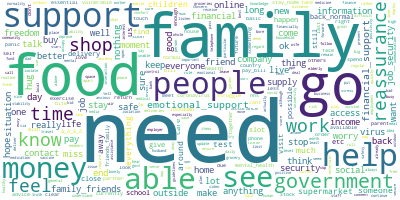

In [42]:
# Make a pretty visual of whats going on behind this question
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed responses together.
long_string = ','.join(" ".join(response) for response in needs_gram_docs)

# Create a WordCloud object
wordcloud = WordCloud(background_color = "white", max_words = 1000, contour_width = 3, contour_color = 'steelblue', collocations = False)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

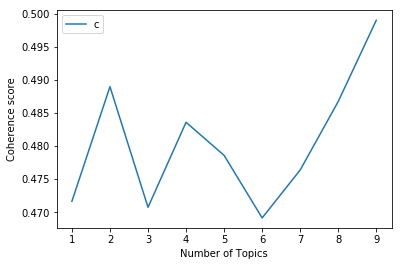

In [43]:
# optimum topics for LSA
start, stop, step = 1, 10, 1
plot_graph(needs_gram_docs, start, stop, step, modeltype = 'lda')

### iii.  Create LDA model

In [44]:
# Run LDA Model
number_of_topics = 4
words = 3
lda_model_needs = create_topic_model(needs_gram_docs, number_of_topics, words, modeltype = 'lda')

[(0, '0.032*"money" + 0.017*"emotional_support" + 0.016*"see"'), (1, '0.020*"family" + 0.016*"security" + 0.013*"none"'), (2, '0.014*"reassurance" + 0.014*"food" + 0.011*"help"'), (3, '0.025*"nothing" + 0.015*"freedom" + 0.011*"need"')]


In [45]:
# Calc cohearance vale for the LDA model
calc_coherence(model = lda_model_needs, doc_clean = needs_gram_docs)

Coherence Score: 0.373045238513073


### iv. Visualise Clusters 

In [46]:
# 2D representation of model result 
visualise_lda_results(needs_gram_docs, lda_model_needs, number_of_topics)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2884 samples in 0.001s...
[t-SNE] Computed neighbors for 2884 samples in 0.040s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2884
[t-SNE] Computed conditional probabilities for sample 2000 / 2884
[t-SNE] Computed conditional probabilities for sample 2884 / 2884
[t-SNE] Mean sigma: 0.000033
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.911388
[t-SNE] KL divergence after 1000 iterations: 0.272342


Loading BokehJS ...

In [48]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
dictionary, doc_term_matrix = prepare_corpus(needs_gram_docs)
vis = pyLDAvis.gensim.prepare(lda_model_needs, doc_term_matrix, dictionary)
vis
# A low Lambda value indicates how exclusive a word is to a topic, 
# or Lambda closer to 1 indicates the overall probability of a word in the topics (frequency)

/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.019403 -0.105012       1        1  29.713779
2      0.009627  0.033878       2        1  27.782293
3      0.095165  0.020550       3        1  21.984837
1     -0.085389  0.050584       4        1  20.519089, topic_info=     Category        Freq               Term       Total  loglift  logprob
82    Default  120.000000            nothing  120.000000  30.0000  30.0000
42    Default  202.000000              money  202.000000  29.0000  29.0000
430   Default   68.000000           security   68.000000  28.0000  28.0000
97    Default   62.000000            freedom   62.000000  27.0000  27.0000
168   Default   99.000000  emotional_support   99.000000  26.0000  26.0000
475   Default   49.000000               none   49.000000  25.0000  25.0000
35    Default  169.000000             family  169.000000  24.0000  24.0000
10    Default   61.000000               sure   61.000000  23.0000  23.0000
169   Default  129.000000                see  129.000000  22.0000  22.0000
38    Default   47.000000            company   47.000000  21.0000  21.0000
549   Default   36.000000               dont   36.000000  20.0000  20.0000
28    Default  101.000000        reassurance  101.000000  19.0000  19.0000
24    Default   90.000000               shop   90.000000  18.0000  18.0000
301   Default   36.000000        back_normal   36.000000  17.0000  17.0000
108   Default   47.000000       job_security   47.000000  16.0000  16.0000
40    Default   43.000000             income   43.000000  15.0000  15.0000
143   Default   34.000000           pay_bill   34.000000  14.0000  14.0000
577   Default   21.000000                big   21.000000  13.0000  13.0000
351   Default   18.000000      grandchildren   18.000000  12.0000  12.0000
296   Default   39.000000            someone   39.000000  11.0000  11.0000
286   Default   51.000000               good   51.000000  10.0000  10.0000
57    Default   36.000000               come   36.000000   9.0000   9.0000
460   Default   25.000000              clear   25.000000   8.0000   8.0000
156   Default   61.000000               keep   61.000000   7.0000   7.0000
160   Default   87.000000          financial   87.000000   6.0000   6.0000
213   Default   22.000000          stability   22.000000   5.0000   5.0000
247   Default   24.000000               cure   24.000000   4.0000   4.0000
4     Default   17.000000         employment   17.000000   3.0000   3.0000
1197  Default   17.000000           daughter   17.000000   2.0000   2.0000
1184  Default   19.000000          childcare   19.000000   1.0000   1.0000
...       ...         ...                ...         ...      ...      ...
425    Topic4   14.470277               bill   23.435205   1.1017  -5.4787
35     Topic4   69.287079             family  169.096542   0.6916  -3.9125
132    Topic4   12.699133            country   21.325321   1.0655  -5.6092
123    Topic4   12.610714        financially   21.613674   1.0450  -5.6162
298    Topic4   11.177901             safety   18.612629   1.0739  -5.7368
263    Topic4   13.673804               love   25.306120   0.9683  -5.5353
162    Topic4   10.163950                nhs   17.502497   1.0403  -5.8319
106    Topic4   39.714302                get  126.915970   0.4220  -4.4691
0      Topic4   21.986092                end   53.582664   0.6930  -5.0604
680    Topic4   10.080401                say   17.430771   1.0362  -5.8402
128    Topic4   12.481880             future   24.887833   0.8937  -5.6265
16     Topic4   31.696741  financial_support  106.954269   0.3676  -4.6946
22     Topic4   41.846321               need  177.265198   0.1402  -4.4168
194    Topic4   30.516914            support  119.052307   0.2225  -4.7325
5      Topic4   29.246960                 go  114.316666   0.2206  -4.7750
89     Topic4   15.519013           anything   39.223591   0.6566  -5.4087
45     Topic4   13.822099        

### v. Asign topics to full data set

In [47]:
df_topic_sents_keywords = format_topics_sentences(lda_model = lda_model_needs, doc_clean = needs_gram_docs)

# Format
df_dominant_topic_needs = df_topic_sents_keywords.reset_index()
df_dominant_topic_needs.columns = ['needs_doc_no', 'needs_topic', 'needs_topic_perc', 'needs_keywords', 'needs_text']
df_dominant_topic_needs.head(15)

,needs_doc_no,needs_topic,needs_topic_perc,needs_keywords,needs_text
0,0,1.0,0.7394,"family, security, none, need, get, company, fi...","[know, end]"
1,1,2.0,0.6100,"reassurance, food, help, financial, government...",[reasurerance]
2,2,1.0,0.4878,"family, security, none, need, get, company, fi...","[employment, opportunities, sure, position, st..."
3,3,1.0,0.9602,"family, security, none, need, get, company, fi...","[_ô, á_ô_á_ô, á_ô_á_ô, á_ô_á_ô, á_ô_á_ô, á_ô_á..."
4,4,2.0,0.8643,"reassurance, food, help, financial, government...","[financial_support, government, help, pay, mor..."
5,5,2.0,0.6226,"reassurance, food, help, financial, government...","[need, talk, friends, need, go, shop, out]"
6,6,3.0,0.6258,"nothing, freedom, need, sure, go, support, kee...","[reassurance, government, police, corrupt]"
7,7,2.0,0.9188,"reassurance, food, help, financial, government...","[begin, need, moral, financial_support, family..."
8,8,1.0,0.8049,"family, security, none, need, get, company, fi...","[give, family, hug]"
9,9,1.0,0.6220,"family, security, none, need, get, company, fi...",[company]


### vi. Conclusion for 'needs' / S03Q04 feature

Four topics is few enough to allow for each topic to be sufficiently different from the others, with an adequate coherence score, around 0.27, but while not creating unneeded complexity through a large number of topics. 

#### Four topics identified:
1. Money
2. Essentials (food / government help)
3. Nothing / lockdown end 
4. Loved ones

These four topics have been mapped into the dataset and can now be used as a categorical variable in place of the free-test response to the original question. 

## 5. Clustering the full dataset according to emotional / behavioural responses

### i. Consolidate data
Start by understadning the distribution of the need and effect vairables in relation to one another, and combining them into the full data set.

In [49]:
# one full dataset 
full_needs_df = pd.merge(df_nulls.drop(['S03Q03', 'S03Q04'], axis = 1),
                  df_dominant_topic_needs[['needs_topic', 'needs_topic_perc']],
                  left_index = True, 
                  right_index = True)
full_df = pd.merge(full_needs_df,
                  df_dominant_topic_effect[['effect_topic', 'effect_topic_perc']],
                  left_index = True, 
                  right_index = True)


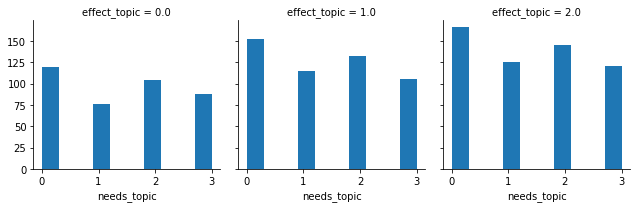

In [50]:
# distribution of the needs and effect variables.
import seaborn as sns
g = sns.FacetGrid(full_df, col = 'effect_topic')
g = g.map(plt.hist, 'needs_topic')

# Sice thes distributions of the 'needs' and 'effect' variables dont differ much in relatoin to one another (see below) there is  
# little benefit in clstering for every permutation of these features. 
# Instead, analysis will focus on the needs variable, which has the stronger of the two topic models, and so should produce more 
# interesting results. 

### ii. Clustering (& automatic encoding)

Using K Modes clustering, since the vast majority of the data is categorical.

In [76]:
cluster_df_copy = full_df.copy()
cluster_df = full_df.copy()

In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cluster_df = full_df.apply(le.fit_transform)
# cluster_df.head()

NameError: name 'full_df' is not defined

#### a. Cao initialisation
First we initialise the cluster centres using the Cao et al methodology: by considering the distance between objects and the density of each object. 

In [79]:
# Using K-modes using Cao initialisation
from kmodes.kmodes import KModes

km_cao = KModes(n_clusters = 3, init = "Cao", n_init = 1, verbose = 1)
fitClusters_cao = km_cao.fit_predict(cluster_df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 493, cost: 182996.0
Run 1, iteration: 2/100, moves: 180, cost: 182475.0
Run 1, iteration: 3/100, moves: 10, cost: 182469.0
Run 1, iteration: 4/100, moves: 2, cost: 182467.0
Run 1, iteration: 5/100, moves: 1, cost: 182467.0


In [80]:
# Predicted Clusters
fitClusters_cao

array([1, 0, 2, ..., 0, 0, 0], dtype=uint16)

In [81]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = cluster_df.columns

In [82]:
# Mode of the clusters
clusterCentroidsDf

,S01Q02,S01Q03,S01Q04,S01Q05,S01Q06,S02Q01_01,S02Q01_02,S02Q01_03,S02Q01_04,S02Q01_05,...,O,C,E,A,N,WHGT,needs_topic,needs_topic_perc,effect_topic,effect_topic_perc
0,0,4,2,0,1,1,1,1,1,1,...,83,70,195,100,246,267,0,229,2,242
1,0,1,2,0,1,1,1,1,1,1,...,83,70,195,100,207,455,0,234,2,902
2,0,1,1,0,5,0,1,1,1,1,...,83,70,195,100,246,177,0,229,1,765


#### b. Huang initialisation 
Then using the original Huang et al. initialisation.

In [83]:
# Using K-Mode with "Huang" initialization
km_huang = KModes(n_clusters = 4, init = "Huang", n_init = 1, verbose = 1)
fitClusters_huang = km_huang.fit_predict(cluster_df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 374, cost: 180925.0
Run 1, iteration: 2/100, moves: 82, cost: 180732.0
Run 1, iteration: 3/100, moves: 38, cost: 180693.0
Run 1, iteration: 4/100, moves: 16, cost: 180682.0
Run 1, iteration: 5/100, moves: 8, cost: 180682.0


In [84]:
# Predicted clusters
fitClusters_huang

array([3, 0, 3, ..., 2, 0, 2], dtype=uint16)

### iii. Optimising k, using elbow plot

In [85]:
# Choosing K by comparing Cost against each K
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters = num_clusters, init = "Cao", n_init = 1, verbose = 1)
    kmode.fit_predict(cluster_df)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 202133.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 466, cost: 185963.0
Run 1, iteration: 2/100, moves: 43, cost: 185885.0
Run 1, iteration: 3/100, moves: 0, cost: 185885.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 493, cost: 182996.0
Run 1, iteration: 2/100, moves: 180, cost: 182475.0
Run 1, iteration: 3/100, moves: 10, cost: 182469.0
Run 1, iteration: 4/100, moves: 2, cost: 182467.0
Run 1, iteration: 5/100, moves: 1, cost: 182467.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 545, cost: 182037.0
Run 1, iteration: 2/100, moves: 147, cost: 181506.0
Run 1, iteration: 3/100, moves: 53, cost: 181460.0
Run 1, iteration: 4/100, moves: 18, cost: 181448.0
Run 1, iteration

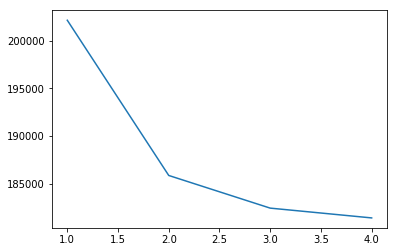

In [86]:
y = np.array([i for i in range(1, 5, 1)])
plt.plot(y, cost)

In [87]:
# chosing k = 2

### iv. Final model

In [88]:
km_cao = KModes(n_clusters = 2, init = "Cao", n_init = 1, verbose = 1)
fitClusters_cao = km_cao.fit_predict(cluster_df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 466, cost: 185963.0
Run 1, iteration: 2/100, moves: 43, cost: 185885.0
Run 1, iteration: 3/100, moves: 0, cost: 185885.0


In [89]:
fitClusters_cao

array([1, 0, 1, ..., 0, 0, 0], dtype=uint16)

In [90]:
# Combining the predicted clusters with the original DF.
cluster_df = cluster_df_copy.reset_index()

In [91]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([cluster_df, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)
combinedDf.replace(' ', np.nan, inplace = True)

In [92]:
# combinedDf.head()

### v. Profiling based on clustering: Group A or Group B

In [93]:
# Cluster Identification
cluster_A = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_B = combinedDf[combinedDf['cluster_predicted'] == 1]
combinedDf['cluster_predicted'].replace([0, 1], ['A', 'B'], inplace = True)

In [94]:
cluster_A.describe()

,S02Q02,S02Q06,S05Q01b_Harm,S05Q01b_Fariness,S05Q01b_In_Group,S05Q01b_Authority,S05Q01b_Purity,S06Q06_01,S06Q06_02,S06Q06_03,...,C,E,A,N,WHGT,needs_topic,needs_topic_perc,effect_topic,effect_topic_perc,cluster_predicted
count,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,...,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.0
mean,1.719626,2.785047,2.518024,2.716956,2.684913,3.496662,3.583445,1.789052,2.497997,1.712951,...,3.795478,3.499655,4.001773,3.233092,1.020130,1.392523,0.753242,1.130841,0.784224,0.0
std,0.786859,1.379952,1.337952,1.306092,1.338268,1.277762,1.446938,0.726384,0.723227,0.759331,...,0.655840,0.879328,0.629925,1.026443,0.330507,1.128506,0.140724,0.811990,0.139996,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.657521,1.000000,1.000000,1.000000,0.607349,0.000000,0.250000,0.000000,0.333300,0.0
25%,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000,...,3.368496,2.983258,3.726093,2.485531,0.792154,0.000000,0.623800,0.000000,0.668300,0.0
50%,2.000000,3.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,3.000000,2.000000,...,3.790445,3.509981,4.000000,3.243496,0.897512,1.000000,0.766400,1.000000,0.828700,0.0
75%,2.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,2.000000,3.000000,2.000000,...,4.315043,4.000000,4.460041,4.000000,1.142770,2.000000,0.872900,2.000000,0.896100,0.0
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,3.000000,...,5.000000,5.000000,5.000000,5.000000,2.424326,3.000000,0.977300,2.000000,0.978400,0.0


In [95]:
cluster_B.describe()

,S02Q02,S02Q06,S05Q01b_Harm,S05Q01b_Fariness,S05Q01b_In_Group,S05Q01b_Authority,S05Q01b_Purity,S06Q06_01,S06Q06_02,S06Q06_03,...,C,E,A,N,WHGT,needs_topic,needs_topic_perc,effect_topic,effect_topic_perc,cluster_predicted
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,...,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.0
mean,1.886202,3.073969,2.472262,2.677098,2.793741,3.571835,3.485064,1.926031,2.334282,1.739687,...,3.814516,3.486492,3.974627,3.363704,0.939335,1.396871,0.759611,1.100996,0.804305,1.0
std,0.952502,1.392979,1.341433,1.326747,1.293801,1.334467,1.418033,0.768090,0.799255,0.767356,...,0.712935,0.869710,0.645532,0.963645,0.253688,1.133706,0.149202,0.784310,0.131950,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.289026,1.000000,1.000000,1.000000,0.599536,0.000000,0.250000,0.000000,0.333300,1.0
25%,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,1.000000,...,3.342479,2.995493,3.539959,2.730488,0.777543,0.000000,0.623700,0.000000,0.727950,1.0
50%,2.000000,3.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,3.000000,2.000000,...,3.972564,3.509981,4.000000,3.486992,0.869072,1.000000,0.804100,1.000000,0.853900,1.0
75%,2.000000,4.000000,3.000000,4.000000,4.000000,5.000000,5.000000,3.000000,3.000000,2.000000,...,4.342479,4.000000,4.460041,4.000000,1.013393,2.000000,0.886900,2.000000,0.904350,1.0
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,3.000000,...,5.000000,5.000000,5.000000,5.000000,2.424326,3.000000,0.982900,2.000000,0.989000,1.0


In [96]:
combinedDf['cluster_predicted'].value_counts()

A    749
B    703
Name: cluster_predicted, dtype: int64

### a) 'need' and 'effect' variables

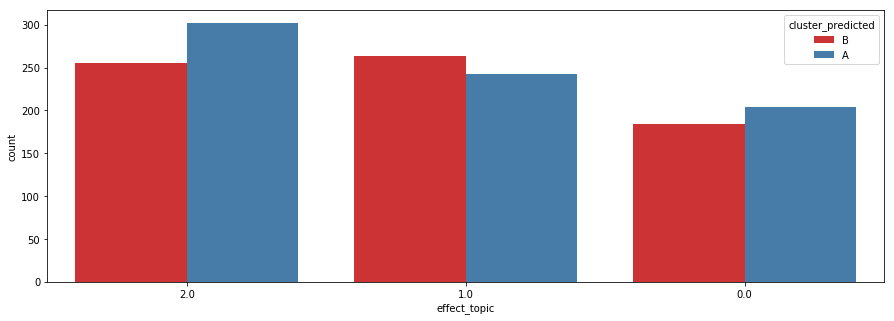

In [97]:
# effect topics variable 
plt.subplots(figsize = (15,5))
sns.countplot(x = combinedDf['effect_topic'], 
              order = combinedDf['effect_topic'].value_counts().index, 
              hue = combinedDf['cluster_predicted'],
              palette = "Set1")
plt.show()

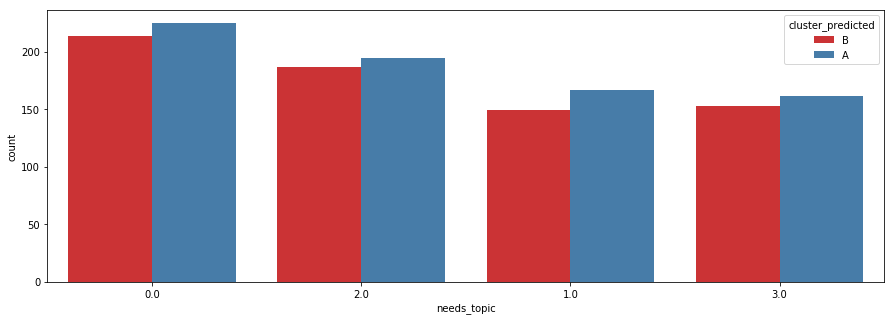

In [98]:
# needs topics variable 
plt.subplots(figsize = (15,5))
sns.countplot(x = combinedDf['needs_topic'], 
              order = combinedDf['needs_topic'].value_counts().index,
              hue = combinedDf['cluster_predicted'],
              palette = "Set1")
plt.show()

<span style="color:red">Minor observation:</span>
##### Needs & Effects of Covid-19
There are no significant divergences between the two groups in there responses to these questions.

### b) Demographics

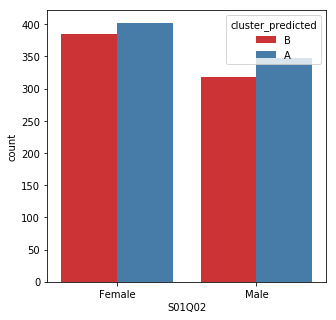

In [99]:
# Gender
plt.subplots(figsize = (5,5))
sns.countplot(x = combinedDf['S01Q02'], 
              order = combinedDf['S01Q02'].value_counts().index, 
              hue = combinedDf['cluster_predicted'],
              palette = "Set1")
plt.show()

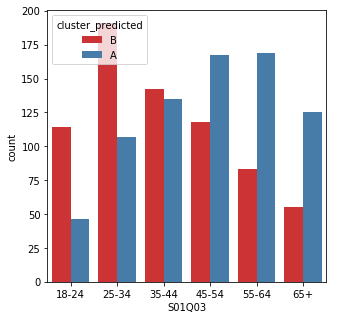

In [100]:
# age
plt.subplots(figsize = (5,5))
var_order = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
sns.countplot(x = combinedDf['S01Q03'], 
              order = var_order, 
              hue = combinedDf['cluster_predicted'],
              palette = "Set1")
plt.show()

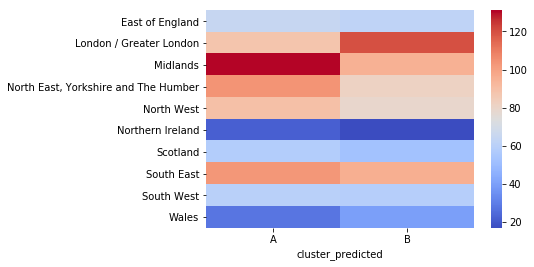

In [101]:
# location comparison 
d = pd.get_dummies(combinedDf['S01Q04'])
d['cluster_predicted'] = combinedDf['cluster_predicted']
_ = sns.heatmap(d.groupby('cluster_predicted').sum().T, cmap = 'coolwarm')

In [102]:
# lets see that in numbers
combinedDf.groupby(['cluster_predicted', 'S01Q04']).size().unstack(fill_value = 0)

S01Q04,East of England,London / Greater London,Midlands,"North East, Yorkshire and The Humber",North West,Northern Ireland,Scotland,South East,South West,Wales
cluster_predicted,,,,,,,,,,
A,65,88,131,104,90,22,58,103,60,28
B,62,120,95,82,79,17,53,96,59,40


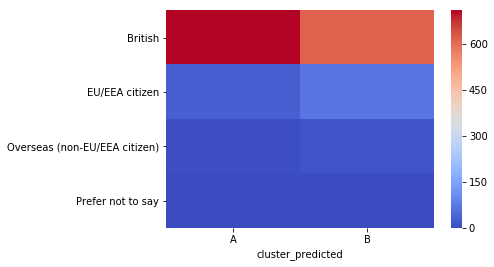

In [103]:
# Nationality - S01Q05
d = pd.get_dummies(combinedDf['S01Q05'])
d['cluster_predicted'] = combinedDf['cluster_predicted']
_ = sns.heatmap(d.groupby('cluster_predicted').sum().T, cmap = 'coolwarm')

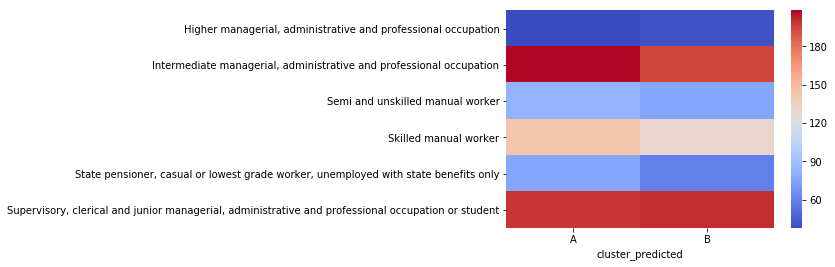

In [104]:
# Job - S01Q06
d = pd.get_dummies(combinedDf['S01Q06'])
d['cluster_predicted'] = combinedDf['cluster_predicted']
_ = sns.heatmap(d.groupby('cluster_predicted').sum().T, cmap = 'coolwarm')

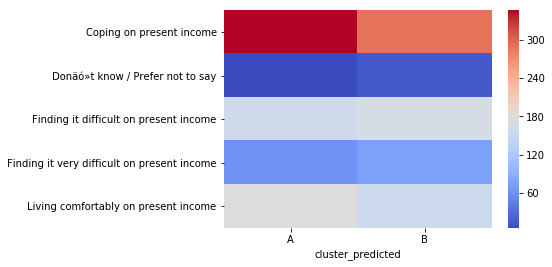

In [105]:
# Income levels 
d = pd.get_dummies(combinedDf['S08Q06'])
d['cluster_predicted'] = combinedDf['cluster_predicted']
_ = sns.heatmap(d.groupby('cluster_predicted').sum().T, cmap = 'coolwarm')

<span style="color:red">Major observations:</span>
##### Age:
Group A is significantly skewed towards older people (model group 55-64 years) whereas group B is much younger, with a model age band of 25-34.

<span style="color:red">Minor observations:</span>
##### Gender, job, income:
There are no significant divergences between the two groups in terms of age, job type and gender. Most people are in low or mid-level management and most are coping on their current salaries.

##### Location & nationality :
However, there does apear to be a notable geographical skew. Group A are skewed towards the midlands and the north east while group B is biased towards London and has twice as many EU citizens.

### c) Numerical questions; OCEAN personality scores + 'where are we now?'

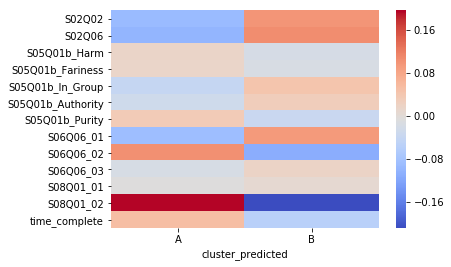

In [106]:
# Profiling by heat map for numeric varuables 
from sklearn.preprocessing import scale, robust_scale
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

combinedDf['needs_topic'] = combinedDf['needs_topic'].astype(str).astype(object)
combinedDf['effect_topic'] = combinedDf['effect_topic'].astype(str).astype(object)
combinedDf['cluster_predicted'] = combinedDf['cluster_predicted'].astype(str).astype(object)

numerical = combinedDf.dtypes[combinedDf.dtypes != 'object'].keys()
exclude = ['needs_topic_perc', 'effect_topic_perc', 'O', 'C', 'E', 'A', 'N', 'WHGT'
] + [col for col in numerical if 'type' in col or 'mode' in col or 'ransom' in col]
X_profiling = combinedDf[numerical.drop(exclude)].fillna(0)
X_profiling = pd.DataFrame(scale(X_profiling), columns = X_profiling.columns)
X_profiling['cluster_predicted'] = combinedDf['cluster_predicted']
_ = sns.heatmap(X_profiling.groupby('cluster_predicted').mean().T, cmap = 'coolwarm')


In [107]:
# lets see the completion time in numbers
combinedDf[['cluster_predicted', 'time_complete']].groupby(['cluster_predicted']).agg('mean').round()
# 28 mins versus 30 mins average 

,time_complete
cluster_predicted,
A,1801.0
B,1678.0


In [109]:
# favorite forms of comms
import scipy.stats as stats
combinedDf[['cluster_predicted', 'S06Q06_01', 'S06Q06_02', 'S06Q06_03']].groupby(['cluster_predicted']).agg(lambda x: stats.mode(x)[0])
#(1 stands for the most favourite, and 3 for the least )

,S06Q06_01,S06Q06_02,S06Q06_03
cluster_predicted,,,
A,2,3,1
B,2,3,1


<span style="color:red">Major observations:</span>
##### S08Q01_02: 'Someone supporting alternative lifestyles, new cultures and breaking taboos supporting causes like feminism, immigration and social justice | Someone supporting tradition and the culture and heritage of my people supporting causes like religion, traditional'
This question explores liberal versus traditional values. Group A more strongly identifies with traditional values than B, though both are slightly biased to traditional.

<span style="color:red">Minor observations:</span>
##### S02Q02: State of Emergency | Business as usual 
##### S02Q06: I would rather be where I am | I would rather be somewhere else 
There is some divergence between the two groups on these questions. Both groups averages agree that this is a state of emergency and they would rather be elsewhere. Group A however trends a little lower in both cases, indicating that for group A it's a more serious case of emergency and that they are less inclined to be elsewhere.

(This assumnes 1 is high and 5 is low, as has been used elsewhere in the survey - exclusing OCEAN traits)

##### S06Q06:  Styles of communication prefered -  fun, outgoing, indulgent  vs  rebellious, different  vs  thoughtful, intellectual, rational
the most popular style of communication from both A and B groups was 'rebelious and different', followed by 'fun and outgoing'.

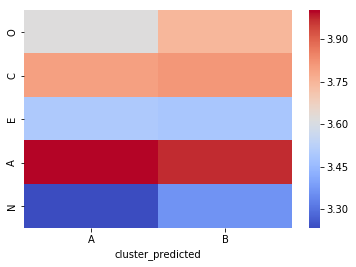

In [110]:
# Comparing clusters to OCEAN behavioural scores
d = combinedDf.loc[: ,['O', 'C', 'E', 'A', 'N']]
d['cluster_predicted'] = combinedDf['cluster_predicted']
_ = sns.heatmap(d.groupby('cluster_predicted').mean().T, cmap = 'coolwarm')


<span style="color:red">Minor observation:</span>
##### O & N: Openness and Nuroticism 
Those in group B tend to (on average) have higher openness and neuroticism scores, with the modal response to the latter being 5, the highest value. We might suggest from this that group B has higher intelect and imagination, but also is more prone to anxiety and worry.

(This assumnes 5 is high and 1 is low, as has been used elsewhere in the survey)

In [111]:
# Average O & N values 
ocean_A = cluster_A[['O', 'C', 'E', 'A', 'N', 'WHGT']].mean()
ocean_B = cluster_B[['O', 'C', 'E', 'A', 'N', 'WHGT']].mean()
print('Group A:', '\n', ocean_A, '\n', '\n', 'Group B:', '\n', ocean_B)

Group A: 
 O       3.619742
C       3.795478
E       3.499655
A       4.001773
N       3.233092
WHGT    1.020130
dtype: float64 
 
 Group B: 
 O       3.749232
C       3.814516
E       3.486492
A       3.974627
N       3.363704
WHGT    0.939335
dtype: float64


### d) The effect on employment situation

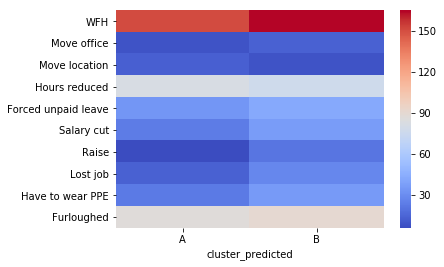

In [112]:
# Comparing clusters to employment changes
from scipy import stats
employment = ['S08Q03_01', 'S08Q03_02', 'S08Q03_03', 'S08Q03_04', 'S08Q03_05', 
                       'S08Q03_06', 'S08Q03_07', 'S08Q03_08', 'S08Q03_09', 'S08Q03_10']
d = combinedDf.loc[: ,employment]
d.columns = ['WFH', 'Move office', 'Move location', 'Hours reduced', 'Forced unpaid leave', 
             'Salary cut', 'Raise', 'Lost job', 'Have to wear PPE', 'Furloughed']
d['cluster_predicted'] = combinedDf['cluster_predicted']
# replacing all 'checked' / 'unchecked' with binary
d.replace(['Checked','Unchecked'], [1, 0], inplace = True)
_ = sns.heatmap(d.groupby('cluster_predicted').sum().T, cmap = 'coolwarm')


<span style="color:red">Minor observation:</span>
##### S08Q03: Employment Changes
By far the most common trend is having to work from home. Other commen responses were people either being put on furlough or having their hours cut. This didnt vary notably across groupes A and B.

### e) Current feelings / emotions

In [113]:
#remove already modelled variables
demographics = ['S01Q02', 'S01Q03', 'S01Q04', 'S01Q05', 'S01Q06']
complete = ['S01Q06', 'S02Q02', 'S02Q06']
remove_list = [employment + complete + demographics + numerical.tolist()]

for rem_col in remove_list[0]:
    if rem_col in combinedDf.columns.tolist():
        combinedDf.drop(rem_col, axis = 1, inplace = True)


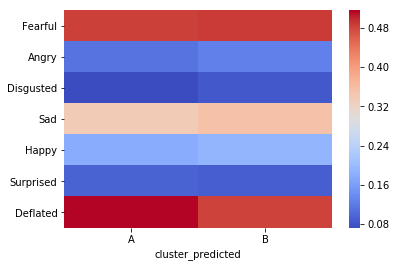

In [114]:
# Emotions at the current time
emotions = ['S02Q01_01', 'S02Q01_02', 'S02Q01_03', 'S02Q01_04', 'S02Q01_05', 'S02Q01_06', 'S02Q01_07']
d = combinedDf.loc[:, emotions]
# get col names
col_names = []
for col in emotions:
    tmp = get_description(col)
    name = tmp.split(',', 1)[0]
    col_names.append(name)
d.columns = col_names
d.replace(['Checked','Unchecked'], [1, 0], inplace = True)
d['cluster_predicted'] = combinedDf['cluster_predicted']
_ = sns.heatmap(d.groupby('cluster_predicted').mean().T, cmap = 'coolwarm')

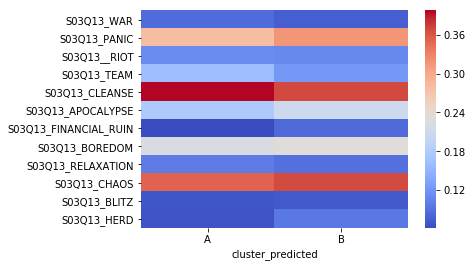

In [115]:
# Feelings about the outbreak
outbreak_feelings = []
for col in combinedDf.columns: 
    if col.startswith('S03Q13_'):
        outbreak_feelings.append(col)

d = combinedDf.loc[:, outbreak_feelings]
d.replace(['Checked','Unchecked'], [1, 0], inplace = True)
d['cluster_predicted'] = combinedDf['cluster_predicted']
_ = sns.heatmap(d.groupby('cluster_predicted').mean().T, cmap = 'coolwarm')

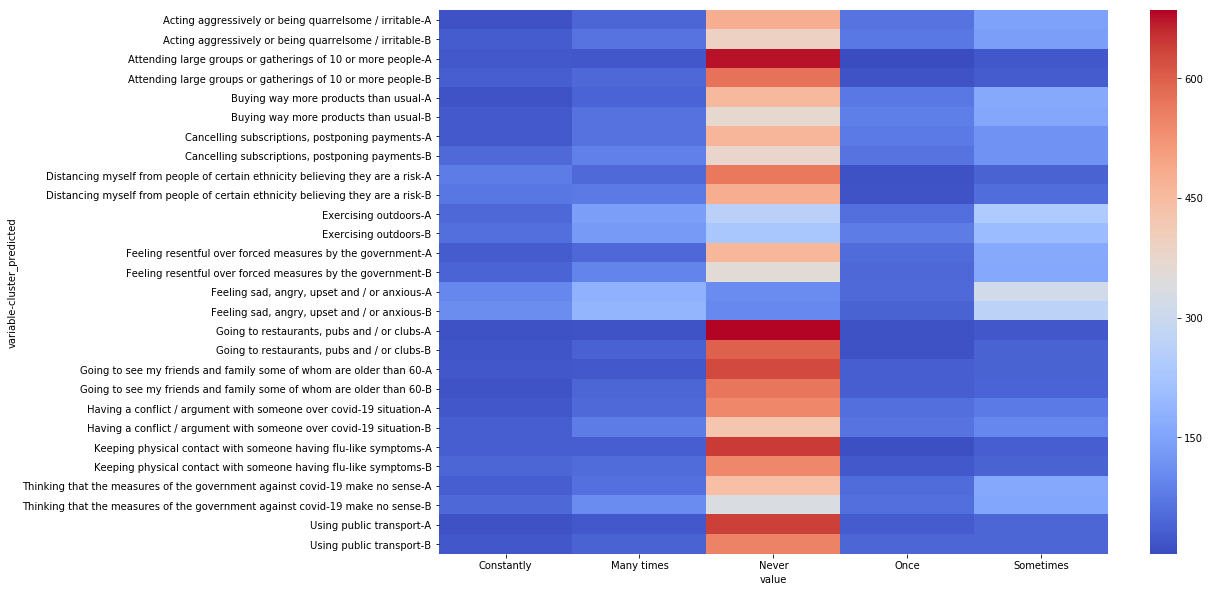

In [116]:
# What has Covid 19 made you do??! Recent behaviours
plt.rcParams['figure.figsize'] = [15, 10]
recent_behaviour = []
for col in combinedDf.columns: 
    if col.startswith('S04Q03_'):
        recent_behaviour.append(col)
col_names = []
for col in recent_behaviour:
    tmp = get_description(col)
    name = tmp.split(':', 1)[0]
    col_names.append(name)
d = combinedDf.loc[:, recent_behaviour]
d.columns = col_names
d['cluster_predicted'] = combinedDf['cluster_predicted']
# plot
d_melt = pd.melt(d, 
                 id_vars = ['cluster_predicted'], 
                 value_vars = col_names).groupby(['variable', 'cluster_predicted', 'value']).size().unstack(fill_value = 0)
_ = sns.heatmap(d_melt, cmap = 'coolwarm')



<span style="color:red">Minor observation:</span>
##### S02Q01 + S03Q13: Emotions + Feelings
By far the most common emotions are fear and a sense of being deflated. Similarly, 'chaos' and 'cleanse / redemption' were the most related to emotions about the current crisis. Though there aren't significant divergence across the two groups. 

##### S04Q03: Behaviours in the last week, due to Covid 19
Those in group A reported taking lockdown more seriously. They were more adamant to comit to not having gone to restaurants or bars, not using public transport, and not being in contact with people with symptoms, over the past week. 

### f) Likes, brands & passions

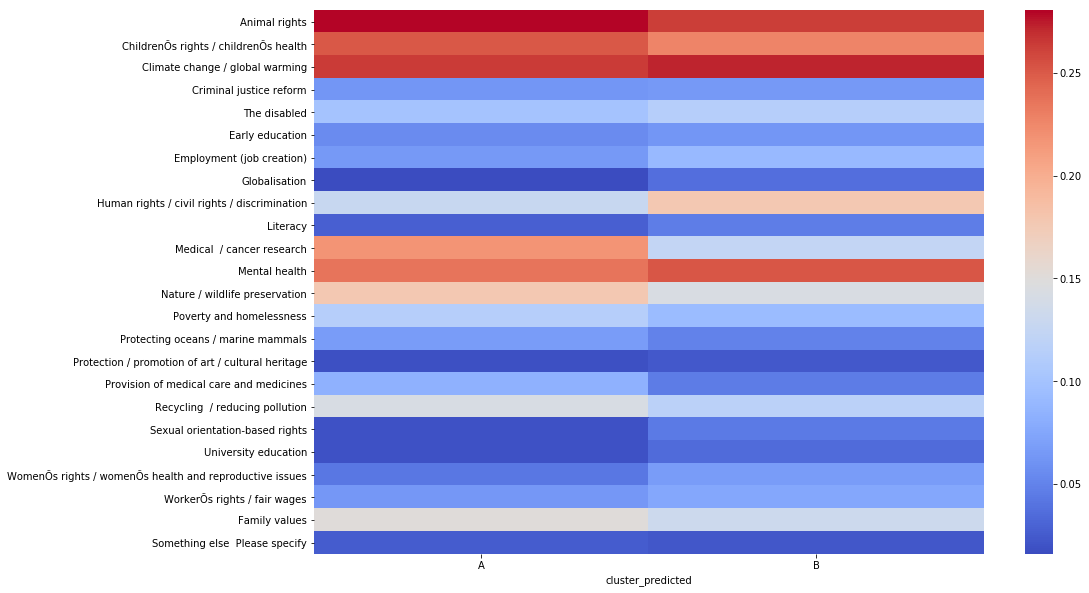

In [117]:
# Personal passions
plt.rcParams['figure.figsize'] = [15, 10]
passions = []
for col in combinedDf.columns: 
    if col.startswith('S07Q02_'):
        passions.append(col)
col_names = []
for col in passions:
    tmp = get_description(col)
    name = tmp.split(':', 1)[0]
    col_names.append(name)
        
d = combinedDf.loc[:, passions]
d.columns = col_names
d.replace(['Checked','Unchecked'], [1, 0], inplace = True)
d['cluster_predicted'] = combinedDf['cluster_predicted']
_ = sns.heatmap(d.groupby('cluster_predicted').mean().T, cmap = 'coolwarm')

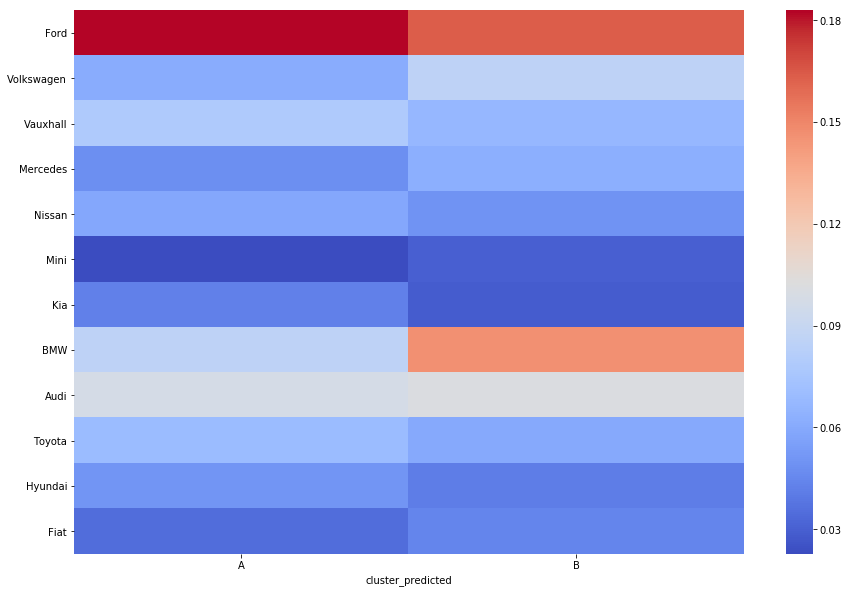

In [118]:
# cars
cars = []
for col in combinedDf.columns: 
    if col.startswith('S07Q03_'):
        cars.append(col)
cars.remove('S07Q03_13_OTHER')
cars.remove('S07Q03_13')
col_names = []
for col in cars:
    tmp = get_description(col)
    name = tmp.split(':', 1)[0]
    col_names.append(name)
        
d = combinedDf.loc[:, cars]
d.columns = col_names
d.replace(['Checked','Unchecked'], [1, 0], inplace = True)
d['cluster_predicted'] = combinedDf['cluster_predicted']
_ = sns.heatmap(d.groupby('cluster_predicted').mean().T, cmap = 'coolwarm')

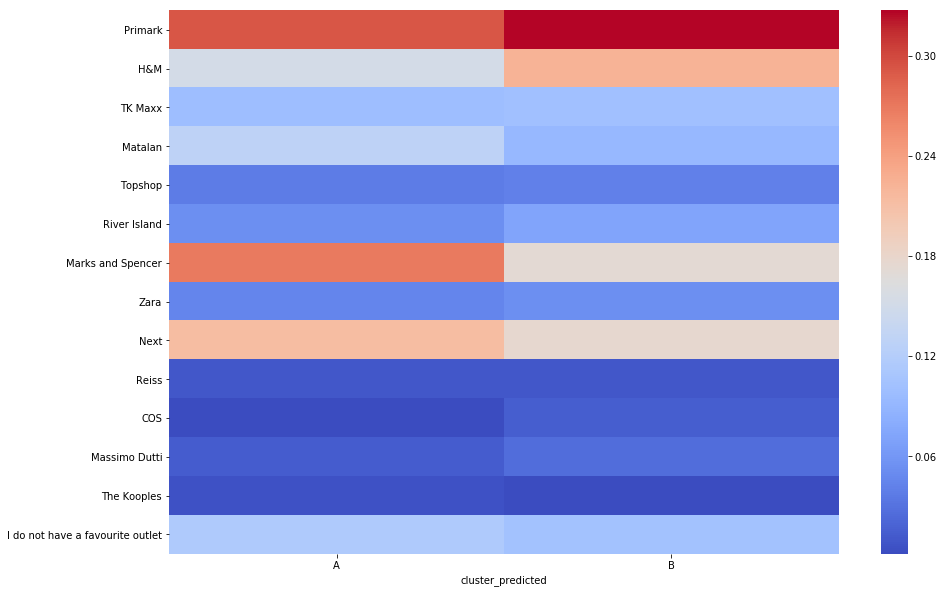

In [119]:
# High St clothes shops
clothes = []
for col in combinedDf.columns: 
    if col.startswith('S07Q04_'):
        clothes.append(col)
clothes.remove('S07Q04_14_OTHER')
clothes.remove('S07Q04_14')
col_names = []
for col in clothes:
    tmp = get_description(col)
    name = tmp.split(':', 1)[0]
    col_names.append(name)
        
d = combinedDf.loc[:, clothes]
d.columns = col_names
d.replace(['Checked','Unchecked'], [1, 0], inplace = True)
d['cluster_predicted'] = combinedDf['cluster_predicted']
_ = sns.heatmap(d.groupby('cluster_predicted').mean().T, cmap = 'coolwarm')

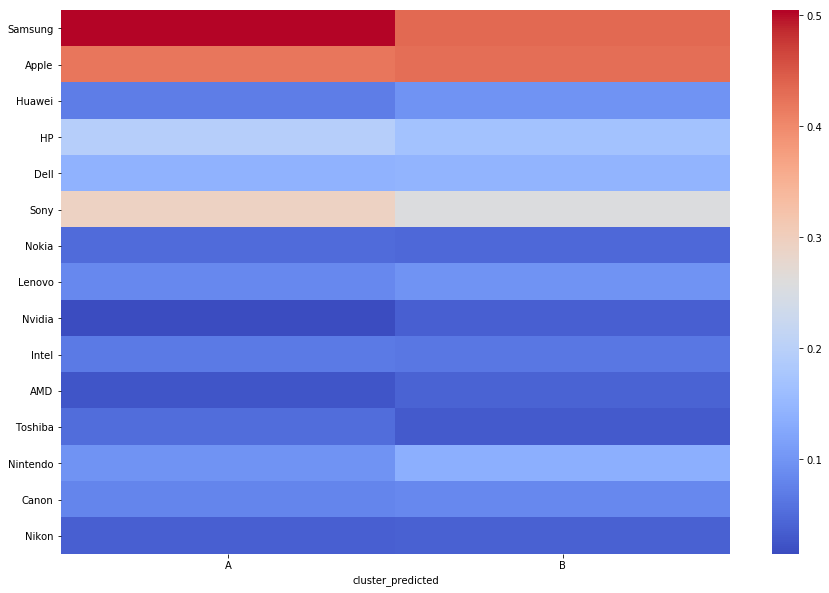

In [120]:
# tech brands
tech = []
for col in combinedDf.columns: 
    if col.startswith('S07Q05_'):
        tech.append(col)
col_names = []
for col in tech:
    tmp = get_description(col)
    name = tmp.split(':', 1)[0]
    col_names.append(name)
        
d = combinedDf.loc[:, tech[:15]]
d.columns = col_names[:15]
d.replace(['Checked','Unchecked'], [1, 0], inplace = True)
d['cluster_predicted'] = combinedDf['cluster_predicted']
_ = sns.heatmap(d.groupby('cluster_predicted').mean().T, cmap = 'coolwarm')

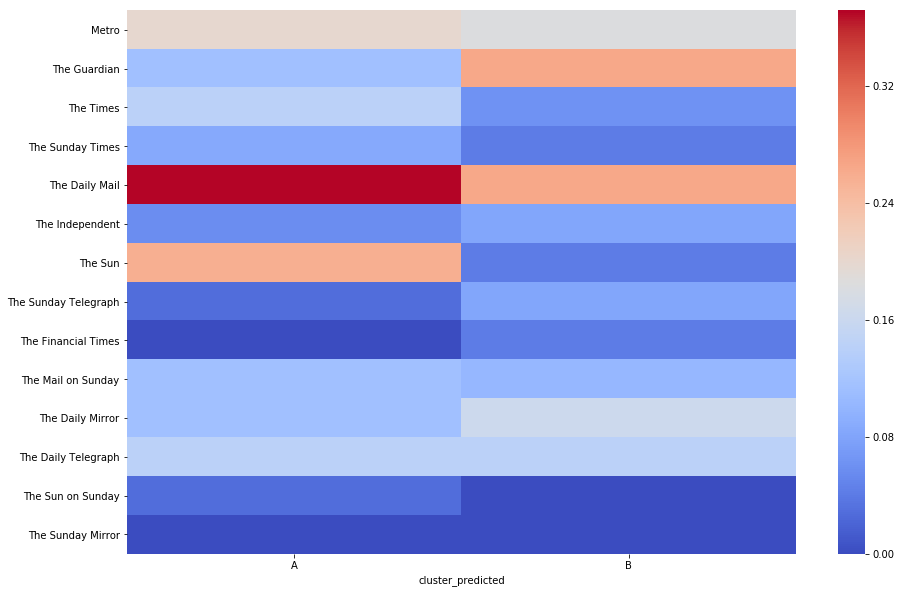

In [121]:
# news brands
news = []
for col in combinedDf.columns: 
    if col.startswith('S06Q04_'):
        news.append(col)
col_names = []
for col in news:
    tmp = get_description(col)
    name = tmp.split(':', 1)[0]
    col_names.append(name)
d = combinedDf.loc[:, news[:14]]
d.columns = col_names[:14]
d.replace(['Checked','Unchecked'], [1, 0], inplace = True)
d['cluster_predicted'] = combinedDf['cluster_predicted']
_ = sns.heatmap(d.groupby('cluster_predicted').mean().T, cmap = 'coolwarm')

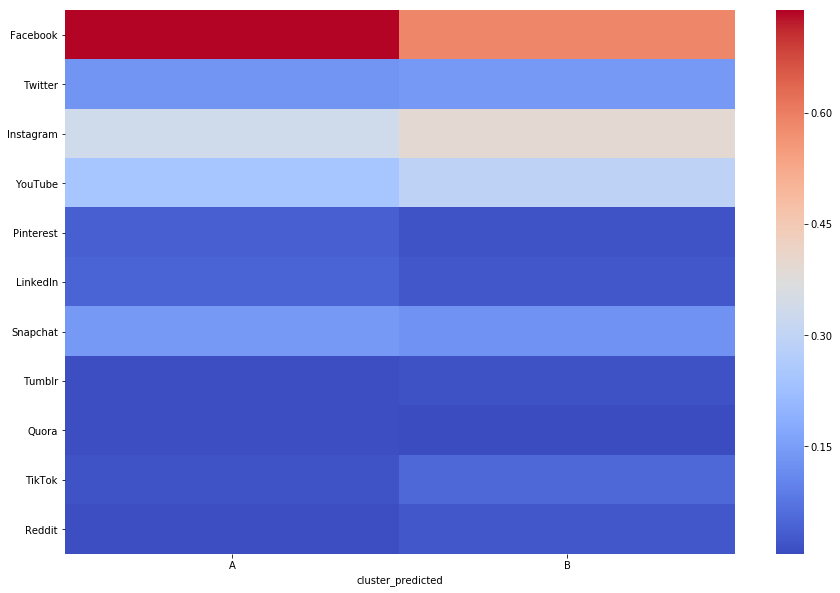

In [122]:
# social media
social = []
for col in combinedDf.columns: 
    if col.startswith('S06Q02_'):
        social.append(col)
col_names = []
for col in social:
    tmp = get_description(col)
    name = tmp.split(':', 1)[0]
    col_names.append(name)
d = combinedDf.loc[:, social[:11]]
d.columns = col_names[:11]
d.replace(['Checked','Unchecked'], [1, 0], inplace = True)
d['cluster_predicted'] = combinedDf['cluster_predicted']
_ = sns.heatmap(d.groupby('cluster_predicted').mean().T, cmap = 'coolwarm')

<span style="color:red">Observation:</span>

##### Passions
Everyone is passionate about animal rights, climate change and childrens rights according to the survey, and few care for our cultural heritage and globalisation. The divide comes human rights and mental health which are biased to group B, whereas A's prefer to champion cancer research and wildlife preservation.

##### Cars
Ford is loved by all, but especially by group A, whereas BMW is reserves largely for group B.

##### Clothes stores (High St)
Budget stores like Primark and H&M are favorites of group B, whereas  group A prefer M&S and Next.

##### Tech  
Group A prefer Samsung and Sony to group B. Generally speaking, Samsung and Apple are the most popular tech brands.

##### News 
Group A prefer the Daily Mail and The Sun. Whereas group B are more likely to read the Guardian.

##### Social media
Group A are more keen on facebook than B, and B are more likely to also use Instagram.

In [ ]:
# THE END 